In [3]:
import pandas as pd

file_path = 'HKQuantityTypeIdentifierStepCount.csv'

# Attempt to read the CSV file with a semicolon delimiter and skipping the first row
try:
    step_data = pd.read_csv(file_path, delimiter=';', skiprows=1)
except Exception as e:
    print(f"Error reading file: {e}")

# If successful, proceed with processing
if 'step_data' in locals():
    # Convert 'startdate' to datetime and extract date
    step_data['startdate'] = pd.to_datetime(step_data['startdate'])
    step_data['date'] = step_data['startdate'].dt.date

    # Group by date and sum steps
    daily_steps = step_data.groupby('date')['value'].sum().reset_index()
    print(daily_steps.head())


         date  value
0  2021-07-23     65
1  2021-07-24   3933
2  2021-07-25  11207
3  2021-07-26  16219
4  2021-07-27   3974


In [9]:

# It seems the code execution environment has been reset, and the previous data is lost.
# I will re-import the pandas library, reload the data from the CSV file, reprocess it, and then add the 'month' column.

import pandas as pd

# Re-load the CSV file, assuming the delimiter is ';' and skipping the first row
file_path = 'HKQuantityTypeIdentifierStepCount.csv'
step_data = pd.read_csv(file_path, delimiter=';', skiprows=1)

# Process the data
step_data['startdate'] = pd.to_datetime(step_data['startdate'])
step_data['date'] = step_data['startdate'].dt.date
daily_steps = step_data.groupby('date')['value'].sum().reset_index()

# Adding the 'month' column
daily_steps['month'] = pd.to_datetime(daily_steps['date']).dt.month

# Display the updated dataframe
daily_steps.head()


,date,value,month
0,2021-07-23,65,7
1,2021-07-24,3933,7
2,2021-07-25,11207,7
3,2021-07-26,16219,7
4,2021-07-27,3974,7
...,...,...,...
95,2021-10-26,6670,10
96,2021-10-27,8905,10
97,2021-10-28,4358,10
98,2021-10-29,1674,10


In [41]:
# Calculating descriptive statistics for the 'daily_steps' dataframe
descriptive_stats = daily_steps.describe().astype(int)



# Display the descriptive statistics
descriptive_stats


,value
count,870
mean,5923
std,4747
min,65
25%,2805
50%,4718
75%,7527
max,37574


In [ ]:
#Count: The total number of entries (days with step counts recorded) is 870.
#Mean: On average, 5923.60 steps were recorded per day.3
#Standard Deviation (std): There is a variation (standard deviation) of 4747.76 steps per day, indicating a moderate spread around the mean.
#Minimum (min): The minimum number of steps recorded in a day is 65.
#25th Percentile: 25% of the days had step counts of 2805.25 or fewer.
#50th Percentile (Median): The median value of daily steps is 4718.50.
#75th Percentile: 75% of the days had step counts of 7527.00 or fewer.
#Maximum (max): The maximum number of steps recorded in a single day is 37574.

In [13]:
#Analyzing my top 10 walking days, every year in my dataset.

import pandas as pd

# Re-load the CSV file, assuming the delimiter is ';' and skipping the first row
file_path = 'HKQuantityTypeIdentifierStepCount.csv'
step_data = pd.read_csv(file_path, delimiter=';', skiprows=1)

# Process the data
step_data['startdate'] = pd.to_datetime(step_data['startdate'])
step_data['date'] = step_data['startdate'].dt.date
daily_steps = step_data.groupby('date')['value'].sum().reset_index()

# Extracting year and month from the 'date' column
daily_steps['year'] = pd.to_datetime(daily_steps['date']).dt.year
daily_steps['month'] = pd.to_datetime(daily_steps['date']).dt.month

# Finding the top 10 days with the highest step counts for each year
top_10_days_per_year = daily_steps.groupby('year').apply(lambda x: x.nlargest(10, 'value')).reset_index(drop=True)

# Display the top 10 days for each year
top_10_days_per_year


,date,value,year,month
0,2021-08-17,16348,2021,8
1,2021-07-26,16219,2021,7
2,2021-08-08,14673,2021,8
3,2021-10-04,12740,2021,10
4,2021-09-18,12023,2021,9
5,2021-07-25,11207,2021,7
6,2021-08-02,10910,2021,8
7,2021-09-29,10872,2021,9
8,2021-08-29,10816,2021,8
9,2021-09-15,10508,2021,9


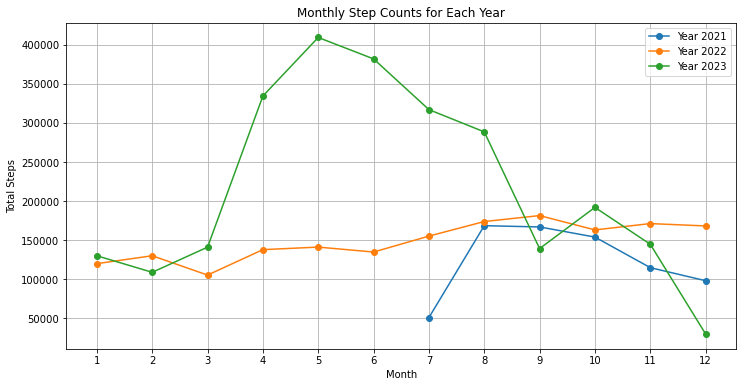

In [14]:
import matplotlib.pyplot as plt

# Assuming 'daily_steps' is your dataframe with columns 'date', 'value', 'year', 'month'
monthly_steps = daily_steps.groupby(['year', 'month'])['value'].sum().reset_index()

# Plotting monthly step counts for each year
plt.figure(figsize=(12, 6))
for year in monthly_steps['year'].unique():
    yearly_data = monthly_steps[monthly_steps['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['value'], marker='o', label=f'Year {year}')

plt.title('Monthly Step Counts for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Steps')
plt.xticks(range(1, 13))  # Set x-ticks for each month
plt.legend()
plt.grid(True)
plt.show()


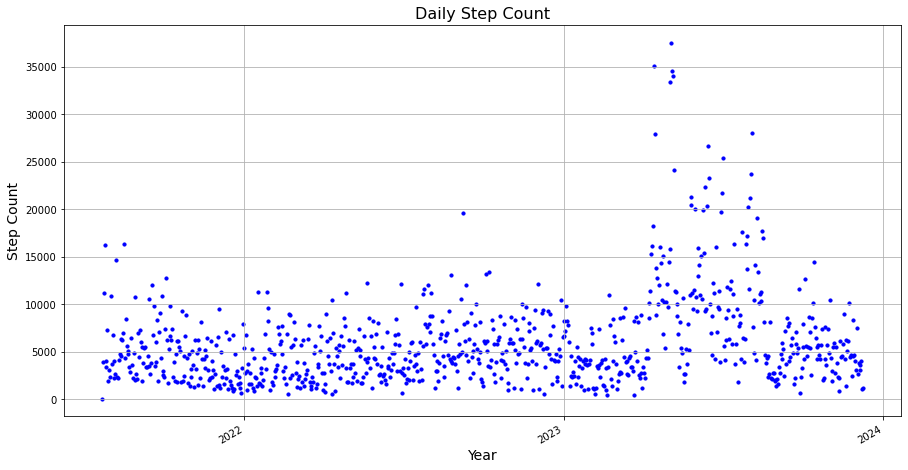

In [22]:
# Re-importing pandas and matplotlib.pyplot due to the reset of the code execution environment
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Re-load the CSV file, assuming the delimiter is ';' and skipping the first row
file_path = 'HKQuantityTypeIdentifierStepCount.csv'
step_data = pd.read_csv(file_path, delimiter=';', skiprows=1)

# Process the data
step_data['startdate'] = pd.to_datetime(step_data['startdate'])
step_data['date'] = step_data['startdate'].dt.date
daily_steps = step_data.groupby('date')['value'].sum().reset_index()

# Plotting daily step counts
plt.figure(figsize=(15, 8))
plt.scatter(daily_steps['date'], daily_steps['value'], color='blue', s=10)

# Formatting the x-axis to show years and rotate the labels for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()

# Setting the title and labels
plt.title('Daily Step Count', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Step Count', fontsize=14)

# Adding a grid for better readability
plt.grid(True)

# Showing the plot
plt.show()


/Users/omeryalcin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


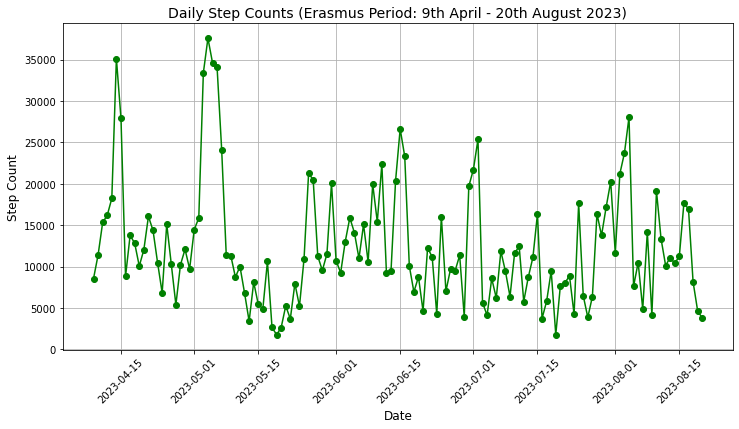

,date,value
625,2023-04-09,8544
626,2023-04-10,11400
627,2023-04-11,15326
628,2023-04-12,16191
629,2023-04-13,18238


In [35]:
# Creating a sample dataset for the specified date range: 9th April to 20th August 2023
erasmus_step_count = daily_steps[(daily_steps['date'] >= pd.to_datetime('2023-04-09')) & 
                                 (daily_steps['date'] <= pd.to_datetime('2023-08-20'))]

# Plotting the daily steps for this sample as a line plot
plt.figure(figsize=(12, 6))
plt.plot(erasmus_step_count['date'], erasmus_step_count['value'], marker='o', color='green')
plt.title('Daily Step Counts (Erasmus Period: 9th April - 20th August 2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 'erasmus_step_count' now contains the sample data
erasmus_step_count.head()



In [40]:
# Calculating descriptive statistics for the 'erasmus_step_count' dataset
erasmus_descriptive_stats = erasmus_step_count.describe().astype(int)

# Display the descriptive statistics
erasmus_descriptive_stats


,value
count,134
mean,12395
std,7332
min,1776
25%,7640
50%,10830
75%,15885
max,37574


/Users/omeryalcin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


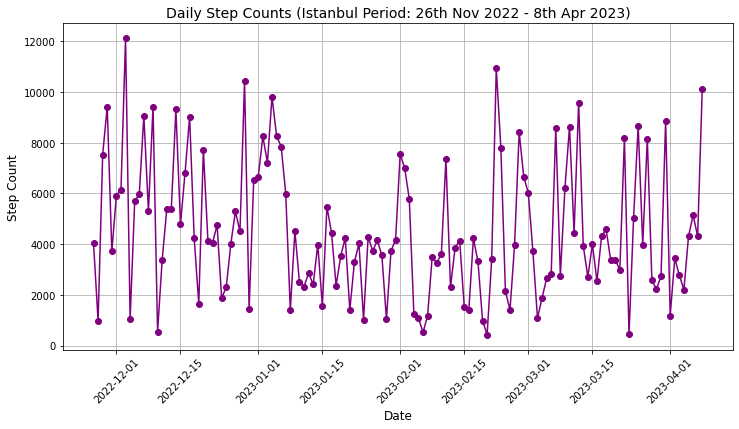

,date,value
491,2022-11-26,4048
492,2022-11-27,972
493,2022-11-28,7535
494,2022-11-29,9427
495,2022-11-30,3714


In [36]:
# Creating a sample dataset for the specified date range: 26th November 2022 to 8th April 2023
istanbul_step_count = daily_steps[(daily_steps['date'] >= pd.to_datetime('2022-11-26')) & 
                                 (daily_steps['date'] <= pd.to_datetime('2023-04-08'))]

# Plotting the daily steps for this sample as a line plot
plt.figure(figsize=(12, 6))
plt.plot(istanbul_step_count['date'], istanbul_step_count['value'], marker='o', color='purple')
plt.title('Daily Step Counts (Istanbul Period: 26th Nov 2022 - 8th Apr 2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 'istanbul_step_count' now contains the sample data
istanbul_step_count.head()


In [39]:
# Calculating descriptive statistics for the 'erasmus_step_count' dataset
istanbul_descriptive_stats = istanbul_step_count.describe().astype(int)

# Display the descriptive statistics
istanbul_descriptive_stats

,value
count,134
mean,4534
std,2673
min,429
25%,2548
50%,4037
75%,6115
max,12124


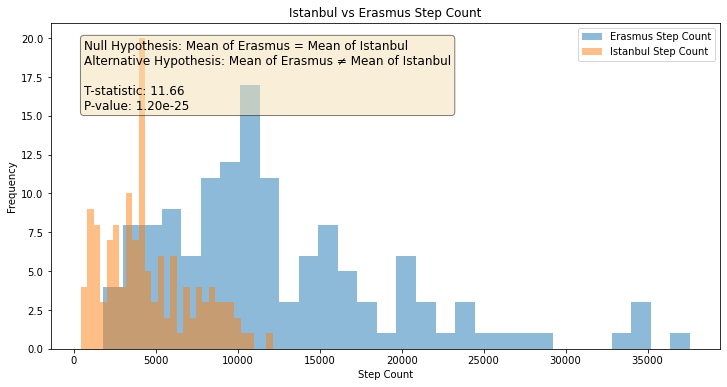

(11.65882534602826, 1.1992331895738105e-25)

In [42]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Performing a two-sample t-test between Erasmus and Istanbul step count samples
t_stat, p_value = ttest_ind(erasmus_step_count['value'], istanbul_step_count['value'])

# Plotting the overlapping histograms for Erasmus and Istanbul step counts
plt.figure(figsize=(12, 6))
plt.hist(erasmus_step_count['value'], bins=30, alpha=0.5, label='Erasmus Step Count')
plt.hist(istanbul_step_count['value'], bins=30, alpha=0.5, label='Istanbul Step Count')
plt.title('Istanbul vs Erasmus Step Count')
plt.xlabel('Step Count')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.05, 0.95, f'Null Hypothesis: Mean of Erasmus = Mean of Istanbul\nAlternative Hypothesis: Mean of Erasmus ≠ Mean of Istanbul\n\nT-statistic: {t_stat:.2f}\nP-value: {p_value:.2e}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

# Returning t-test results
t_stat, p_value


/Users/omeryalcin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


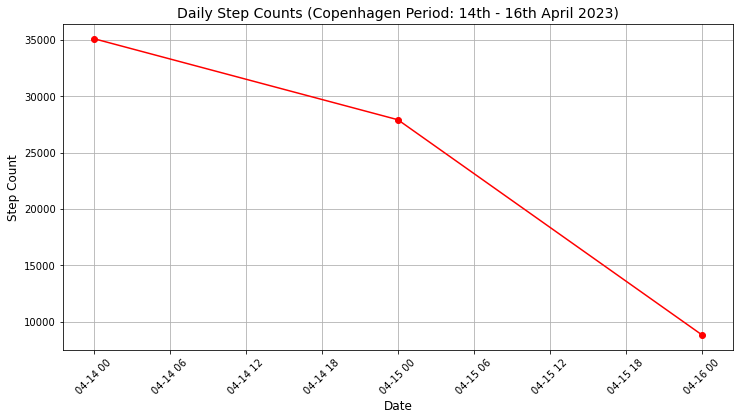

,value
count,3
mean,23949
std,13583
min,8825
25%,18369
50%,27914
75%,31511
max,35109


In [44]:
# Re-importing pandas and matplotlib.pyplot due to the reset of the code execution environment
import pandas as pd
import matplotlib.pyplot as plt

# Re-load the CSV file, assuming the delimiter is ';' and skipping the first row
file_path = 'HKQuantityTypeIdentifierStepCount.csv'
step_data = pd.read_csv(file_path, delimiter=';', skiprows=1)

# Process the data
step_data['startdate'] = pd.to_datetime(step_data['startdate'])
step_data['date'] = step_data['startdate'].dt.date
daily_steps = step_data.groupby('date')['value'].sum().reset_index()

# Creating a sample dataset for the specified date range: 14th April to 16th April 2023
copenhagen_step_count = daily_steps[(daily_steps['date'] >= pd.to_datetime('2023-04-14')) & 
                                    (daily_steps['date'] <= pd.to_datetime('2023-04-16'))]

# Calculating descriptive statistics for the 'copenhagen_step_count' dataset and converting to integer values
copenhagen_descriptive_stats = copenhagen_step_count.describe().astype(int)

# Plotting the daily steps for this sample as a line plot
plt.figure(figsize=(12, 6))
plt.plot(copenhagen_step_count['date'], copenhagen_step_count['value'], marker='o', color='red')
plt.title('Daily Step Counts (Copenhagen Period: 14th - 16th April 2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Displaying the descriptive statistics
copenhagen_descriptive_stats


/Users/omeryalcin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


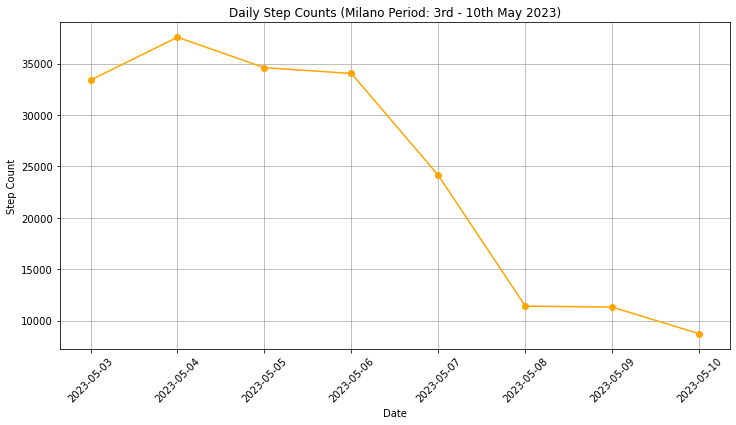

       value
count      8
mean   24403
std    12172
min     8732
25%    11390
50%    28766
75%    34188
max    37574


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
file_path = 'HKQuantityTypeIdentifierStepCount.csv' 
step_data = pd.read_csv(file_path, delimiter=';', skiprows=1)

# Convert 'startdate' to datetime and sum the step counts by date
step_data['startdate'] = pd.to_datetime(step_data['startdate'])
step_data['date'] = step_data['startdate'].dt.date
daily_steps = step_data.groupby('date')['value'].sum().reset_index()

# Creating the Milano step count sample
milano_step_count = daily_steps[(daily_steps['date'] >= pd.to_datetime('2023-05-03')) & 
                                (daily_steps['date'] <= pd.to_datetime('2023-05-10'))]

# Calculating descriptive statistics
milano_descriptive_stats = milano_step_count.describe().astype(int)

# Plotting the daily steps as a line plot
plt.figure(figsize=(12, 6))
plt.plot(milano_step_count['date'], milano_step_count['value'], marker='o', color='orange')
plt.title('Daily Step Counts (Milano Period: 3rd - 10th May 2023)')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print descriptive statistics
print(milano_descriptive_stats)


/Users/omeryalcin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


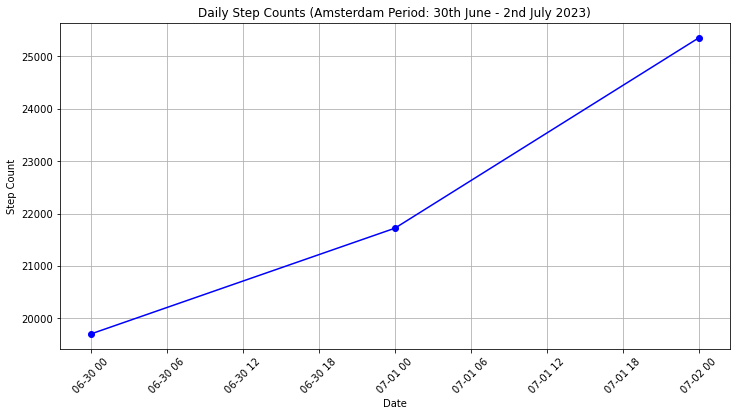

       value
count      3
mean   22259
std     2868
min    19699
25%    20709
50%    21720
75%    23539
max    25359


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
file_path = 'HKQuantityTypeIdentifierStepCount.csv' 
step_data = pd.read_csv(file_path, delimiter=';', skiprows=1)

# Convert 'startdate' to datetime and sum the step counts by date
step_data['startdate'] = pd.to_datetime(step_data['startdate'])
step_data['date'] = step_data['startdate'].dt.date
daily_steps = step_data.groupby('date')['value'].sum().reset_index()

# Creating the Amsterdam step count sample
amsterdam_step_count = daily_steps[(daily_steps['date'] >= pd.to_datetime('2023-06-30')) & 
                                   (daily_steps['date'] <= pd.to_datetime('2023-07-02'))]

# Calculating descriptive statistics
amsterdam_descriptive_stats = amsterdam_step_count.describe().astype(int)

# Plotting the daily steps as a line plot
plt.figure(figsize=(12, 6))
plt.plot(amsterdam_step_count['date'], amsterdam_step_count['value'], marker='o', color='blue')
plt.title('Daily Step Counts (Amsterdam Period: 30th June - 2nd July 2023)')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print descriptive statistics
print(amsterdam_descriptive_stats)



/Users/omeryalcin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


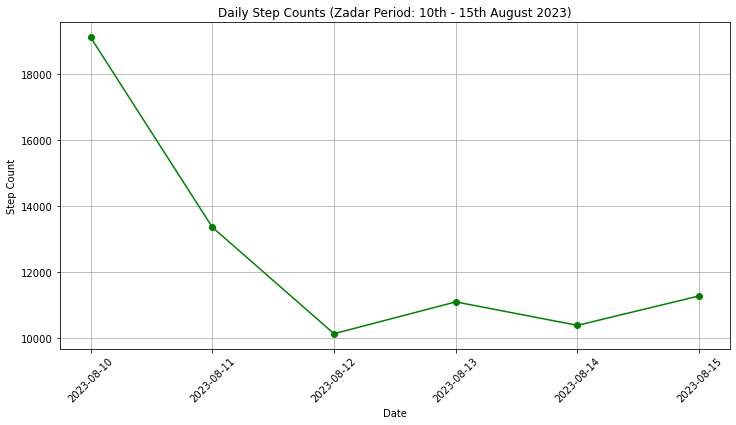

       value
count      6
mean   12564
std     3410
min    10132
25%    10563
50%    11188
75%    12842
max    19126


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
file_path = 'HKQuantityTypeIdentifierStepCount.csv' 
step_data = pd.read_csv(file_path, delimiter=';', skiprows=1)

# Convert 'startdate' to datetime and sum the step counts by date
step_data['startdate'] = pd.to_datetime(step_data['startdate'])
step_data['date'] = step_data['startdate'].dt.date
daily_steps = step_data.groupby('date')['value'].sum().reset_index()

# Creating the Zadar step count sample
zadar_step_count = daily_steps[(daily_steps['date'] >= pd.to_datetime('2023-08-10')) & 
                               (daily_steps['date'] <= pd.to_datetime('2023-08-15'))]

# Calculating descriptive statistics
zadar_descriptive_stats = zadar_step_count.describe().astype(int)

# Plotting the daily steps as a line plot
plt.figure(figsize=(12, 6))
plt.plot(zadar_step_count['date'], zadar_step_count['value'], marker='o', color='green')
plt.title('Daily Step Counts (Zadar Period: 10th - 15th August 2023)')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print descriptive statistics
print(zadar_descriptive_stats)


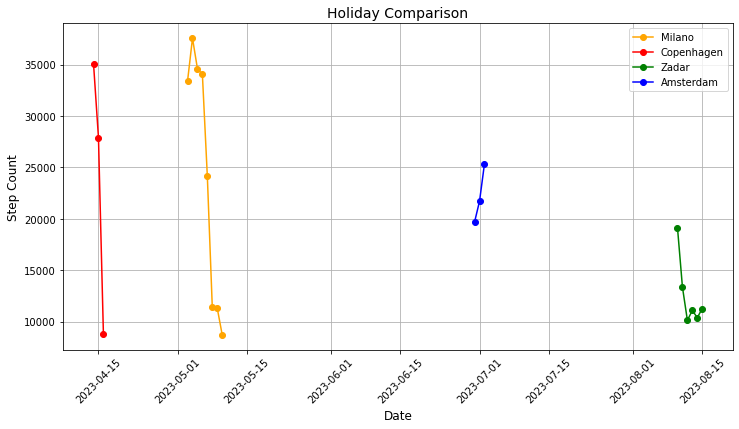

F_onewayResult(statistic=1.9619876989427987, pvalue=0.1604004938270146)

In [53]:
from scipy.stats import f_oneway

# Preparing the step count values from each sample for ANOVA
milano_values = milano_step_count['value']
copenhagen_values = copenhagen_step_count['value']
zadar_values = zadar_step_count['value']
amsterdam_values = amsterdam_step_count['value']

# Performing ANOVA
anova_result = f_oneway(milano_values, copenhagen_values, zadar_values, amsterdam_values)

# Plotting the overlapping line plots for each sample
plt.figure(figsize=(12, 6))
plt.plot(milano_step_count['date'], milano_step_count['value'], marker='o', color='orange', label='Milano')
plt.plot(copenhagen_step_count['date'], copenhagen_step_count['value'], marker='o', color='red', label='Copenhagen')
plt.plot(zadar_step_count['date'], zadar_step_count['value'], marker='o', color='green', label='Zadar')
plt.plot(amsterdam_step_count['date'], amsterdam_step_count['value'], marker='o', color='blue', label='Amsterdam')
plt.title('Holiday Comparison', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Returning ANOVA results
anova_result


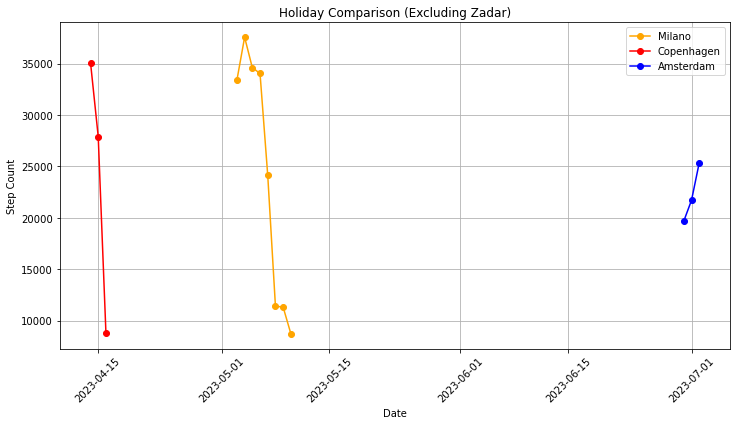

ANOVA Result (Excluding Zadar): F-statistic = 0.03893630374893996, P-value = 0.961943916051738


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Performing ANOVA on the step count values of Milano, Copenhagen, and Amsterdam samples (excluding Zadar)
anova_result_excluding_zadar = f_oneway(milano_step_count['value'], copenhagen_step_count['value'], 
                                        amsterdam_step_count['value'])

# Plotting the overlapping line plots for each sample
plt.figure(figsize=(12, 6))
plt.plot(milano_step_count['date'], milano_step_count['value'], marker='o', color='orange', label='Milano')
plt.plot(copenhagen_step_count['date'], copenhagen_step_count['value'], marker='o', color='red', label='Copenhagen')
plt.plot(amsterdam_step_count['date'], amsterdam_step_count['value'], marker='o', color='blue', label='Amsterdam')
plt.title('Holiday Comparison (Excluding Zadar)')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print ANOVA results excluding Zadar
print(f"ANOVA Result (Excluding Zadar): F-statistic = {anova_result_excluding_zadar.statistic}, P-value = {anova_result_excluding_zadar.pvalue}")
